In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [61]:
data = pd.read_csv("project 2_cleaning_dataset.csv")
data.head(10)    

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
#Determine the shape of the data

In [63]:
data.shape

(48895, 16)

In [65]:
#To dispaly the information of the data

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [69]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [71]:
#Idetify the type of data

In [73]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [75]:
#Identify the empty cells

In [77]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [79]:
#Drop rows or columns with missing value

In [81]:
data.dropna(inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [83]:
#CHECKING AND REMOVING DUPLICATED DATA

In [85]:
data.shape

(38821, 16)

In [87]:
print(data.duplicated().sum())

0


In [89]:
#Checking for duplicated values

In [91]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [93]:
data.dropna(inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [95]:
#STANDARDIZATION
#Ensuring consistent formatting and unit across the dataset for accurate analysis

In [97]:
data['name'] = data['name'].str.lower()
data['host_name'] = data['host_name'].str.lower()
data['neighbourhood_group'] = data['neighbourhood_group'].str.lower()
data['neighbourhood'] = data['neighbourhood'].str.lower()
data['room_type'] = data['room_type'].str.lower()
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,large cozy 1 br apartment in midtown east,7322,chris,manhattan,murray hill,40.74767,-73.97500,entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [99]:
data['reviews_per_month'] = data['reviews_per_month'].round()
data['reviews_per_month'] = data['reviews_per_month'].astype(int)
data.dtypes
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0,2,355
3,3831,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,5,1,194
4,5022,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0,1,0
5,5099,large cozy 1 br apartment in midtown east,7322,chris,manhattan,murray hill,40.74767,-73.97500,entire home/apt,200,3,74,2019-06-22,1,1,129


In [101]:
#TREATING OUTLIERS DETECTION

In [103]:
#calculating mean,standard deviation and z-score for each of the data

In [105]:
mean = data['price'].mean()
std_dev = data['price'].std()
data['z_score'] = (data['price'] - mean) / std_dev
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
print("outliers:")
print(outliers)

outliers:
             id                                               name    host_id  \
85        19601                perfect for a family or small group      74303   
496      174966              luxury 2bed/2.5bath central park view     836168   
662      250801                 heart & soul of greenwich village     1314834   
691      256328          luxury chelsea townhouse at the high line    1347034   
762      273190          6 bedroom landmark west village townhouse     605463   
...         ...                                                ...        ...   
47041  35569459         luxury full floor soho loft | 3 bed/2 bath  163029687   
47063  35576863  javits beautiful stay for your nyc vacation *****   83819376   
47391  35713184  prospect park historic 1br near 2,5,q, b, s tr...   11503187   
47400  35715171  host yr party in style -manhattan roof top for 25   71276635   
47950  36000376                   ★★ 4br 2ba getaway in chelsea ★★  268449136   

                 

In [107]:
print(data.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'z_score'],
      dtype='object')


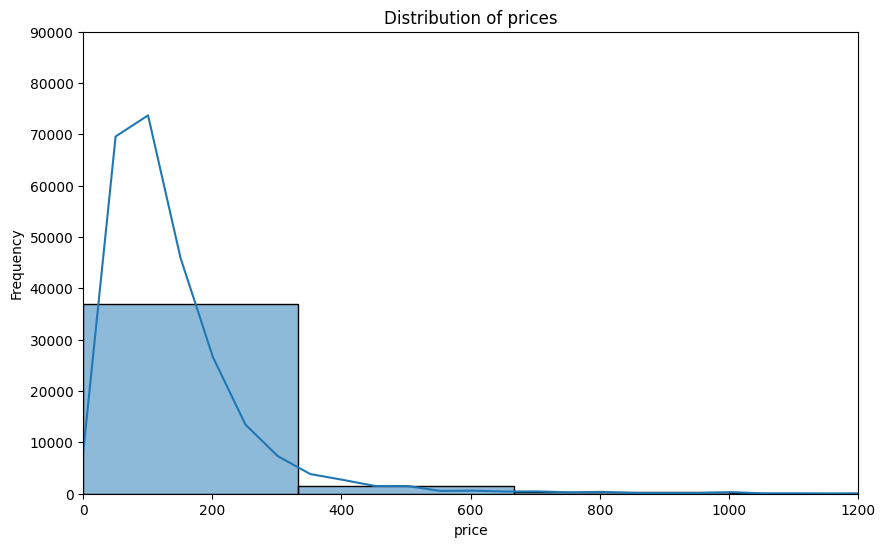

In [109]:
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.xlim(0,1200)
plt.ylim(0,90000)
sns.histplot()
plt.show()

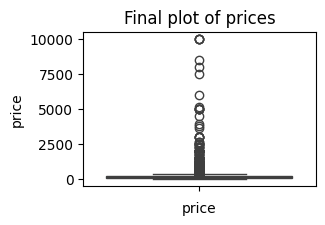

<module 'matplotlib.pyplot' from 'C:\\Users\\Hovarthanvishnu\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>


In [111]:
plt.figure(figsize=(3,2))
sns.boxplot(data['price'])
plt.title('Final plot of prices')
plt.xlabel('price')
plt.show()
print(plt)